# NLP basic tutorial (spanish)

In [20]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 43.4/43.4 MB 4.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [1]:
import os

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger

from wordcloud import WordCloud

import spacy
from spacy import displacy
import es_core_news_md

from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline


entro


In [ ]:
nltk.download()

In [2]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"
os.environ["JAVAHOME"] = "/usr/bin/java"


entro


In [3]:
nlp = es_core_news_md.load()


entro


In [4]:
# Creating a connection to MongoDB
client = MongoClient("localhost", 27017)
db = client["news"]
collection = db["elespectador"]


entro


In [5]:
text = []
for news in list(collection.find({}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["summary"])
    text.append(news["full_text"])


entro


In [6]:
text = " ".join(text)


entro


In [7]:
text


entro


In [8]:
# Word tokenization
words = word_tokenize(text)


entro


In [9]:
words[:10]


entro


In [10]:
# Words distribution
frec_dist = FreqDist(words)


entro


In [11]:
# Printing the most common words
frec_dist.most_common(10)


entro


In [12]:
# Stop words
# Stop words are basically a set of commonly used words in any language, not just English.
# The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

stop_words = set(stopwords.words("spanish"))


entro


In [13]:
stop_words
print("entro")

entro


In [15]:
# Removing stop words
filtered_words = []

for w in words:
    if w.lower() not in stop_words:
        filtered_words.append(w)


In [16]:
# Words distribution for text without stopwords
frec_dist_filtered = FreqDist(filtered_words)
print("entro")

entro


In [17]:
# Printing the most common words
frec_dist_filtered.most_common(10)
print("entro")

entro


entro


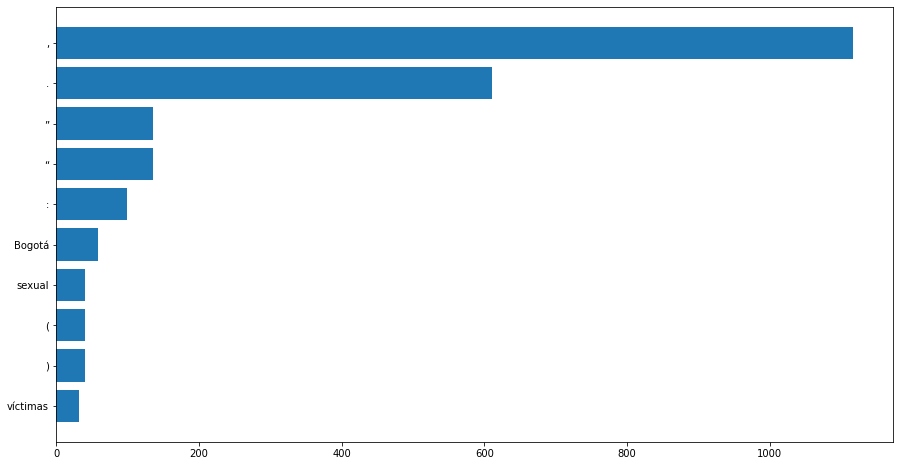

In [18]:
# Plotting a bar char for frecuencies
n = 10

plt.figure(figsize = (15, 8))
plt.barh([ w[0] for w in frec_dist_filtered.most_common(n) ], [ w[1] for w in frec_dist_filtered.most_common(n) ])
plt.gca().invert_yaxis()
print("entro")

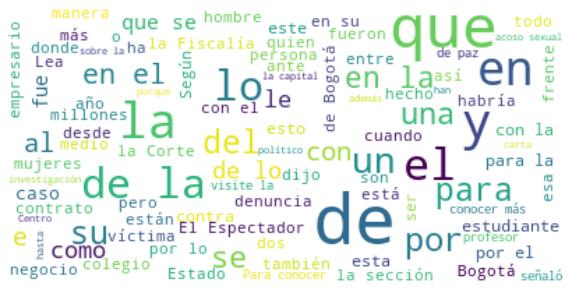

entro


In [19]:
# Creating the wordcloud
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()
print("entro")

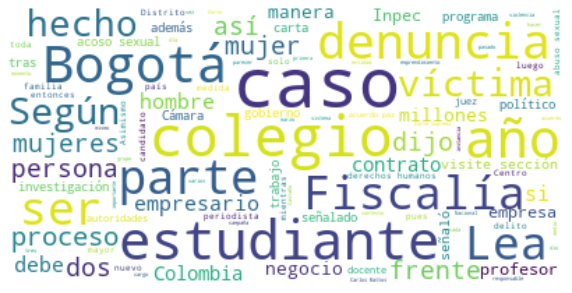

entro


In [20]:
# Creating the wordcloud without stopwords
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(" ".join(filtered_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()
print("entro")

In [21]:
# Part of Speech (PoS)
# Model optimized for spanish: https://nlp.stanford.edu/software/
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf8")
pos_tags = pos_tagger.tag(filtered_words)

In [22]:
pos_tags.sort(key = lambda tup: tup[1])
pos_tags

[('civil', 'ADJ'),
 ('pedido', 'ADJ'),
 ('trimestral', 'ADJ'),
 ('propio', 'ADJ'),
 ('supuesta', 'ADJ'),
 ('civil', 'ADJ'),
 ('trimestral', 'ADJ'),
 ('colombiano', 'ADJ'),
 ('firmantes', 'ADJ'),
 ('pedida', 'ADJ'),
 ('primer', 'ADJ'),
 ('colombiano', 'ADJ'),
 ('básico', 'ADJ'),
 ('armado', 'ADJ'),
 ('colombiano', 'ADJ'),
 ('político', 'ADJ'),
 ('importante', 'ADJ'),
 ('últimas', 'ADJ'),
 ('primer', 'ADJ'),
 ('importante', 'ADJ'),
 ('civiles', 'ADJ'),
 ('importantes', 'ADJ'),
 ('respetados', 'ADJ'),
 ('redactantes', 'ADJ'),
 ('presidencial', 'ADJ'),
 ('hecho', 'ADJ'),
 ('continúas', 'ADJ'),
 ('emitido', 'ADJ'),
 ('sociales', 'ADJ'),
 ('“', 'ADJ'),
 ('exenta', 'ADJ'),
 ('sociales', 'ADJ'),
 ('defensores', 'ADJ'),
 ('reciente', 'ADJ'),
 ('exguerrilleros', 'ADJ'),
 ('indígenas', 'ADJ'),
 ('seguido', 'ADJ'),
 ('marginarlos', 'ADJ'),
 ('representados', 'ADJ'),
 ('primeros', 'ADJ'),
 ('último', 'ADJ'),
 ('entregada', 'ADJ'),
 ('presentes', 'ADJ'),
 ('colombiano', 'ADJ'),
 ('mismo', 'ADJ'),
 (

In [23]:
len(pos_tags)

11508

In [24]:
pos_tags[-100:]

[('cerró', 'VERB'),
 ('obtener', 'VERB'),
 ('señalado', 'VERB'),
 ('conocer', 'VERB'),
 ('visite', 'VERB'),
 ('imponiendo', 'VERB'),
 ('comprometieron', 'VERB'),
 ('gestionar', 'VERB'),
 ('solicitar', 'VERB'),
 ('aceleren', 'VERB'),
 ('presenten', 'VERB'),
 ('conocieran', 'VERB'),
 ('cuidar', 'VERB'),
 ('velar', 'VERB'),
 ('anunció', 'VERB'),
 ('viene', 'VERB'),
 ('adelantando', 'VERB'),
 ('hizo', 'VERB'),
 ('activaron', 'VERB'),
 ('conocer', 'VERB'),
 ('encamina', 'VERB'),
 ('LEA', 'VERB'),
 ('adelanta', 'VERB'),
 ('activado', 'VERB'),
 ('mejorar', 'VERB'),
 ('evitar', 'VERB'),
 ('señaló', 'VERB'),
 ('colaborar', 'VERB'),
 ('fortalecer', 'VERB'),
 ('contribuir', 'VERB'),
 ('disminuir', 'VERB'),
 ('adelantar', 'VERB'),
 ('disminuyendo', 'VERB'),
 ('respetando', 'VERB'),
 ('agregó', 'VERB'),
 ('interesar', 'VERB'),
 ('Abren', 'VERB'),
 ('tomaron', 'VERB'),
 ('informó', 'VERB'),
 ('creó', 'VERB'),
 ('atender', 'VERB'),
 ('reportan', 'VERB'),
 ('inició', 'VERB'),
 ('cuidado', 'VERB'),
 ('

In [25]:
# Named Entity Recognition (NER)
document = nlp(text)
displacy.render(document, style = "ent")

In [26]:
print("f")

f
